# 학습목표
- 감성분석 모델링
    - 감성분석이란? -> 사람의 감정, 기분 태도를 분석하는 기법
- 자연어 처리
    - konlpy 패키지 내에 있는 다양한 형태소 분석기들을 사용
    - konlpy: 한국어 자연어 처리를 위한 파이썬 패키지 

In [1]:
# konply
# 1. 로컬컴퓨터에 환경설정(jdk,jpye)이 까다로워 컴퓨터마다 안될수도 있음 -> colab
# 2. konlpy 중 mecab 형태소분석기 -> 리눅스 운영체제에서 사용가능 -> colab 진행

# 위 두가지 이유로 자연어처리(형태소 분석, 토큰화 작업)은 colab에서 진행

In [2]:
# colab에서 전처리 진행한 clan_morphs.pkl 파일 불러와서 실습 진행
import pickle
with open('data/clean_morphs.pkl','rb') as f: # 읽어올거라서 rb임!
    clean_morphs = pickle.load(f)

In [3]:
clean_morphs

[['배공', '빠르'],
 ['택배', '엉망', '저희', '없이', '놔두'],
 ['아주',
  '아요',
  '바지',
  '정말',
  '아서',
  '구매',
  '어요',
  '가격',
  '대박',
  '입니다',
  '바느질',
  '조금',
  '엉성',
  '지만',
  '편하',
  '성비',
  '최고',
  '예요'],
 ['선물',
  '으로',
  '빨리',
  '아서',
  '전달',
  '했어야',
  '상품',
  '는데',
  '머그',
  '와서',
  '당황',
  '습니다',
  '전화',
  '더니',
  '바로',
  '신다',
  '지만',
  '배송',
  '누락',
  '네요',
  '확인',
  '바로',
  '선물',
  '으면',
  '큰일날',
  '네요',
  '이렇게',
  '배송',
  '오래',
  '걸렸',
  '으면',
  '다시',
  '생각',
  '아요',
  '아쉽',
  '네요'],
 ['민트', '색상', '예뻐요', '손잡이', '용도', '사용', '네요'],
 ['비추',
  '합니다',
  '계란',
  '뒤집',
  '완전',
  '불편',
  '해요',
  '코팅',
  '묻어나',
  '예쁘',
  '실용',
  '으로',
  '보였',
  '는데',
  '생각',
  '보다',
  '진짜',
  '별로',
  '입니다'],
 ['주문',
  '시켰',
  '는데',
  '배송',
  '네요',
  '여기',
  '회사',
  '전화',
  '아무런',
  '연락',
  '으니',
  '답답',
  '다른',
  '에서',
  '추천',
  '드립니다'],
 ['넉넉', '길이', '주문', '는데', '네요', '별로'],
 ['계속', '처럼', '나오', '다가', '지금', '네요'],
 ['인데',
  '전문',
  '속옷',
  '브랜드',
  '위생',
  '팬티',
  '보다',
  '해요',
  '불편',
  '해요',
  '부분',
  '신축성',
 

### 수치화 (특성추출)
- 의미있는 정보를 담고있는 숫자형태로 변경하는 방법
- 빈도기반의 인코딩
- 원핫인코딩
- BOW(Back of Words)
  - countvectorizer: 단순 카운트 기반 벡터화
  - TF-IDF: 특정 문서에 자주 등장하는 단어에 가중치를 주는 방법
  - 단어사전 구축하여 문장내의 단어빈도를 측정 

In [4]:
# 단순 카운트 기반 벡터화 -> countvectorizer 불러오기
from sklearn.feature_extraction.text import CountVectorizer
# 객체생성
cv = CountVectorizer()

In [5]:
sample_text = clean_morphs[:10]

In [6]:
# countvectorizer 안에 토큰화 해주는 기능이 내장되어 있기 때문에 문장을 하나로 전처리해주는 작업이 필요
sample_text2 = [' '.join(s) for s in sample_text]

In [7]:
cv.fit(sample_text2)

CountVectorizer()

In [8]:
# 구축된 단어사전 확인 -> 유니크한 단어들이다!!!!!!!!!
cv.vocabulary_
len(cv.vocabulary_)

104

In [9]:
# 단어사전을 기반으로 문장내의 단어 빈도를 측정!
result = cv.transform(sample_text2)
result

<10x104 sparse matrix of type '<class 'numpy.int64'>'
	with 127 stored elements in Compressed Sparse Row format>

In [10]:
import pandas as pd
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize) # 전체 칼럼보기

In [11]:
# 단어사전에 문장별로 데이터 유무를 확인하고 싶다면? -> toarray()
result.toarray()[0] # 무슨 단어가 있는지 알 수 없는 상태 -> 데이터 프레임이 필요하다!

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
# 위에서 확인한 데이터를 DataFrame으로 만들어서 확인
df = pd.DataFrame([cv.vocabulary_.keys()],
            columns=cv.vocabulary_.values())

In [13]:
result_df=df.sort_index(axis=1) # 무슨 단어인지 + 빈도수 동시에 확인하기 위해 concate 필요

In [14]:
pd.concat([result_df, pd.DataFrame(result.toarray())]) # 두개 합칠거니까 리스트 형태로 만든다.

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,가격,걸렸,계란,계속,구매,길이,나오,넉넉,네요,놔두,...,코팅,큰일날,택배,팬티,편하,합니다,해요,했어야,확인,회사
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,3,0,...,0,1,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# 형태소 분석한 결과를 활용하여 워드클라우드 그려보기!
# 토큰화된 데이터와 별점 데이터를 붙이기
# 긍정데이터만 가져와서 워드클라우드 그리기
# wordcloud 패키지 설치
# !pip install wordcloud

In [16]:
from wordcloud import WordCloud

In [17]:
naver_data = pd.read_csv('data/naver_shopping.txt', delimiter='\t',names=['별점','리뷰'])

In [18]:
clean_morphs

[['배공', '빠르'],
 ['택배', '엉망', '저희', '없이', '놔두'],
 ['아주',
  '아요',
  '바지',
  '정말',
  '아서',
  '구매',
  '어요',
  '가격',
  '대박',
  '입니다',
  '바느질',
  '조금',
  '엉성',
  '지만',
  '편하',
  '성비',
  '최고',
  '예요'],
 ['선물',
  '으로',
  '빨리',
  '아서',
  '전달',
  '했어야',
  '상품',
  '는데',
  '머그',
  '와서',
  '당황',
  '습니다',
  '전화',
  '더니',
  '바로',
  '신다',
  '지만',
  '배송',
  '누락',
  '네요',
  '확인',
  '바로',
  '선물',
  '으면',
  '큰일날',
  '네요',
  '이렇게',
  '배송',
  '오래',
  '걸렸',
  '으면',
  '다시',
  '생각',
  '아요',
  '아쉽',
  '네요'],
 ['민트', '색상', '예뻐요', '손잡이', '용도', '사용', '네요'],
 ['비추',
  '합니다',
  '계란',
  '뒤집',
  '완전',
  '불편',
  '해요',
  '코팅',
  '묻어나',
  '예쁘',
  '실용',
  '으로',
  '보였',
  '는데',
  '생각',
  '보다',
  '진짜',
  '별로',
  '입니다'],
 ['주문',
  '시켰',
  '는데',
  '배송',
  '네요',
  '여기',
  '회사',
  '전화',
  '아무런',
  '연락',
  '으니',
  '답답',
  '다른',
  '에서',
  '추천',
  '드립니다'],
 ['넉넉', '길이', '주문', '는데', '네요', '별로'],
 ['계속', '처럼', '나오', '다가', '지금', '네요'],
 ['인데',
  '전문',
  '속옷',
  '브랜드',
  '위생',
  '팬티',
  '보다',
  '해요',
  '불편',
  '해요',
  '부분',
  '신축성',
 

In [19]:
# 리스트 형태로 되어있는 데이터를 별점과 concat 해주기 위해서 DataFrame으로 변경
# 리스트로 묶여있는 데이터를 문자열로 변경
clean_morphs2 = [' '.join(s) for s in clean_morphs] # 전체 데이터 대상으로 df 만들어줄거라서 한번 더 쓴 코드임.

In [20]:
temp = pd.DataFrame(clean_morphs2, columns=['리뷰'])

In [21]:
review_data = pd.concat([temp, naver_data['별점']], axis=1) # 열단위로 합칠거니까 axis = 1로 해줘야 함.
review_data

,리뷰,별점
0,배공 빠르,5
1,택배 엉망 저희 없이 놔두,2
2,아주 아요 바지 정말 아서 구매 어요 가격 대박 입니다 바느질 조금 엉성 지만 편하...,5
3,선물 으로 빨리 아서 전달 했어야 상품 는데 머그 와서 당황 습니다 전화 더니 바로...,2
4,민트 색상 예뻐요 손잡이 용도 사용 네요,5
...,...,...
199995,장마 그런가 아요,2
199996,다이슨 케이스 구매 어요 다이슨 슈퍼 소닉 드라 이기 케이스 구매 어요 가격 괜찮 ...,5
199997,로드 에서 보다 세배 저렴 네요 ㅜㅜ 자주 이용 할께요,5
199998,이쁘 보이 네요,5


## 2024.09.02.(월)

In [48]:
# 긍정리뷰만 추출
review_pos = review_data[(review_data['별점'] == 5) | (review_data['별점'] == 4)]['리뷰']

In [49]:
review_data

,리뷰,별점
0,배공 빠르,5
1,택배 엉망 저희 없이 놔두,2
2,아주 아요 바지 정말 아서 구매 어요 가격 대박 입니다 바느질 조금 엉성 지만 편하...,5
3,선물 으로 빨리 아서 전달 했어야 상품 는데 머그 와서 당황 습니다 전화 더니 바로...,2
4,민트 색상 예뻐요 손잡이 용도 사용 네요,5
...,...,...
199995,장마 그런가 아요,2
199996,다이슨 케이스 구매 어요 다이슨 슈퍼 소닉 드라 이기 케이스 구매 어요 가격 괜찮 ...,5
199997,로드 에서 보다 세배 저렴 네요 ㅜㅜ 자주 이용 할께요,5
199998,이쁘 보이 네요,5


In [50]:
# 토큰화
# 키위를 활용하여 토큰화
from kiwipiepy.utils import Stopwords
from kiwipiepy import Kiwi

In [51]:
# 키위객체 생성
kiwi = Kiwi()

In [53]:
# 띄어쓰기 교정
kiwi.space(review_pos)

In [54]:
kiwi.tokenize(review_pos)

In [55]:
from tqdm import tqdm as tq

In [56]:
kiwi_list = []
for w in tq(review_pos):
    rs = kiwi.tokenize(w)
    kiwi_list += rs

100%|██████████████████████████████████████████████████████████████████████████| 99963/99963 [01:06<00:00, 1495.02it/s]


In [57]:
# 일반명사, 동사, 형용사를 필터링해서 워드 클라우드 생성
morphs_list = []
for m in kiwi_list :
    if m.tag in ['NNG','VV','VA']:
        morphs_list.append(m.form)

In [58]:
morphs_list

['빠르',
 '바지',
 '구매',
 '가격',
 '박',
 '바느질',
 '편하',
 '성비',
 '최고',
 '민트',
 '색상',
 '예쁘',
 '손잡이',
 '용도',
 '사용',
 '사이즈',
 '촉감',
 '무게',
 '편하',
 '사이즈',
 '구매',
 '친구',
 '나',
 '하',
 '구매',
 '으',
 '이상',
 '가게',
 '운영',
 '사장',
 '대신',
 '구매',
 '구매',
 '가게',
 '으',
 '이쁘',
 '가성',
 '괜찮',
 '바퀴',
 '고정',
 '되',
 '구매',
 '팽이',
 '빠르',
 '배송',
 '감사',
 '생각',
 '고급',
 '옵션',
 '파우',
 '구매',
 '사용',
 '하',
 '선물',
 '사람',
 '사람',
 '모두',
 '만족',
 '고정',
 '보이',
 '걱정',
 '맛있',
 '주문',
 '카페',
 '필요',
 '이불',
 '비',
 '색상',
 '진하',
 '기다리',
 '보람',
 '제품',
 '이유식',
 '초기',
 '사용',
 '후기',
 '구매',
 '슬',
 '사이즈',
 '다양',
 '실리콘',
 '재질',
 '편하',
 '사이즈',
 '달디달',
 '망가지',
 '핸들',
 '돌리',
 '빠르',
 '배송',
 '최고',
 '구매',
 '가게',
 '사용',
 '안주',
 '디피',
 '쁩니',
 '사이즈',
 '구매',
 '내',
 '모르',
 '프린트',
 '선명',
 '예쁘',
 '포인트',
 '보온',
 '기능',
 '최고',
 '시간',
 '접착력',
 '괜찮',
 '흰색',
 '깔끔',
 '아기',
 '재질',
 '애용',
 '리뷰',
 '남기',
 '배송',
 '빠르',
 '편하',
 '밑',
 '위',
 '편하',
 '바르',
 '건조',
 '크림',
 '바르',
 '보습',
 '자리',
 '다그',
 '나오',
 '제품',
 '라',
 '구매',
 '자리',
 '마지막',
 '떨어지',
 '도착',
 '사이즈',
 '구매',
 '토퍼',
 

In [59]:
#워드클라우드 생성
from collections import Counter
from wordcloud import WordCloud

In [60]:
wc = WordCloud(background_color='white',
         random_state=92,
         font_path = r"C:\Windows\Fonts\malgun.ttf")

In [62]:
import matplotlib.pyplot as plt

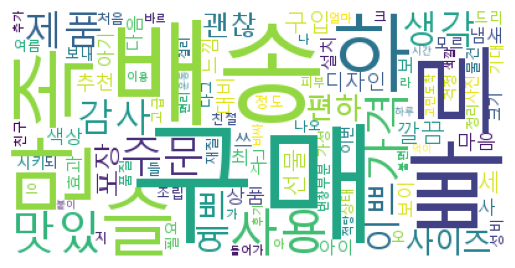

In [65]:
counter = Counter(morphs_list)
words_most_100 = counter.most_common(100)
# 반드시 딕셔너리 형태로 만들어주기
wc_rs = wc.generate_from_frequencies(dict(words_most_100))
plt.axis('off')
plt.imshow(wc_rs)
plt.show()

### TF-IDF 를 활용하여 데이터 벡터화 후 감성분석

In [66]:
# TF-IDF : 하나의 문서에는 자주 등장하고 전체 문서에는 적게 등장하는 단어의 빈도를 측정
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
review_data['리뷰']

0                                                     배공 빠르
1                                            택배 엉망 저희 없이 놔두
2         아주 아요 바지 정말 아서 구매 어요 가격 대박 입니다 바느질 조금 엉성 지만 편하...
3         선물 으로 빨리 아서 전달 했어야 상품 는데 머그 와서 당황 습니다 전화 더니 바로...
4                                    민트 색상 예뻐요 손잡이 용도 사용 네요
                                ...                        
199995                                            장마 그런가 아요
199996    다이슨 케이스 구매 어요 다이슨 슈퍼 소닉 드라 이기 케이스 구매 어요 가격 괜찮 ...
199997                       로드 에서 보다 세배 저렴 네요 ㅜㅜ 자주 이용 할께요
199998                                             이쁘 보이 네요
199999                       아직 사용 다른 제품 어서 모르 지만 배송 빨랐 습니다
Name: 리뷰, Length: 200000, dtype: object

In [68]:
# TF-IDF 객체 생성
tfidf_vect = TfidfVectorizer()
# 단어사전 구축 -> fit()
tfidf_vect.fit(review_data['리뷰'])  

TfidfVectorizer()

In [71]:
# 수치화 (벡터화) -> transform()
tfidf_vect.transform(review_data['리뷰']) # 단어사전의 개수가 너무 많아서 array로 보여줄 수 없음.

<200000x40429 sparse matrix of type '<class 'numpy.float64'>'
	with 1697921 stored elements in Compressed Sparse Row format>

In [72]:
# tf-idf 수치화 -> 하이퍼파라미터 조절
# 하이퍼파라미터 조절 객체 생성
tfidf_vect2 = TfidfVectorizer(stop_words=["하","슬"], #불용어 등록 후 벡터화, 단어가 여러개라서 리스트 씀!
                             ngram_range=(1,2),      #n-gram 설정 (1개 단어,2개 단어)
                             max_df = 0.9,           #최대등장빈도
                             min_df = 8)             #최소등장빈도

# max_df : 전체문서에서 90% 이상 등장하는 단어는 무시
# min_df : 단어가 최소 문서수 이상에서 등장해야지만 벡터화
# 모델의 복잡도를 줄이기 위함(과대적합 방지)

In [73]:
len(review_data)

200000

In [74]:
# 단어사전 구축
tfidf_vect2.fit(review_data['리뷰'])

TfidfVectorizer(max_df=0.9, min_df=8, ngram_range=(1, 2), stop_words=['하', '슬'])

In [80]:
# 벡터화 -> 학습용 문제데이터
review_vect = tfidf_vect2.transform(review_data['리뷰'])

In [81]:
review_data['별점'].unique()

array([5, 2, 1, 4], dtype=int64)

### 모델링

In [105]:
# 수치화된 리뷰데이터를 통하여 별점을 학습 -> 새로운 리뷰 -> 별점 예측
# 선형모델 활용
from sklearn.linear_model import LogisticRegression
# 선형모델 객체 생성
logi_model = LogisticRegression(max_iter=1000) # 최대반복횟수

In [106]:
# 학습 데이터 내에서 다시 학습용, 평가용으로 분리하여 검증 → 교차검증
from sklearn.model_selection import cross_val_score
# cross_val_score(모델명, 문제, 정답, cv = 5)
cross_val_score(logi_model, review_vect, review_data['별점'], cv=5)

array([0.64725 , 0.651925, 0.64995 , 0.649975, 0.651125])

In [107]:
# 모델 학습 (교차검증은 모델 학습 전에도 사용 가능)
logi_model.fit(review_vect, review_data['별점'])


LogisticRegression(max_iter=1000)

In [108]:
# logi_model.predict(테스트용 문제)
# logi_model.predict("정말 별로인 상품입니다. 최악이에요") -> 수치화 필요
# 우리가 평가하고 싶은 새로운 리뷰도 수치화, 벡터화 작업이 필요하다!

In [109]:
# 테스트 데이터 벡터화(단어 사전 이미 있으니 바로 transform)
test_data = tfidf_vect2.transform(["정말 별로인 상품입니다. 최악이에요 다시는 안살거에요"])

In [110]:
test_data2 = tfidf_vect2.transform(["최고로 좋아요"])

In [111]:
logi_model.predict(test_data)

array([5], dtype=int64)

In [112]:
logi_model.predict(test_data2)

array([4], dtype=int64)

In [113]:
test_data3 = tfidf_vect2.transform(["진짜 별로에요. 절대 사지 마세요."])

In [114]:
logi_model.predict(test_data3)

array([1], dtype=int64)

- 토큰화를 어떻게 하느냐에 따라 성능이 달라진다.